In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Reading dataset

In [108]:
dataset = pd.read_csv("Car_Price_dataset.csv")
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,NaN,26.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19.0,25.0,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470.0


In [4]:
dataset.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          float64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg             float64
highwaympg          float64
price               float64
dtype: object

In [109]:
dataset.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           5
carlength           0
carwidth            3
carheight           3
curbweight          1
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           4
stroke              1
compressionratio    2
horsepower          0
peakrpm             0
citympg             3
highwaympg          2
price               0
dtype: int64

In [6]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,200.000000,205.000000,202.000000,202.000000,204.000000,205.000000,201.000000,204.000000,203.000000,205.000000,205.000000,202.000000,203.000000,205.000000
mean,103.000000,0.834146,98.816500,174.049268,65.928218,53.731683,2554.808824,126.907317,3.330100,3.254412,10.155271,104.117073,5125.121951,25.277228,30.822660,13276.710571
std,59.322565,1.245307,6.079414,12.337289,2.152159,2.451801,521.847984,41.642693,0.272101,0.314039,3.989187,39.544167,476.985643,6.515376,6.880744,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.125000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2939.250000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Replacing missing values

In [110]:
for column, content in dataset.items():
    if pd.isna(content).sum():
        content.fillna(content.mean(), inplace=True)

In [111]:
dataset.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

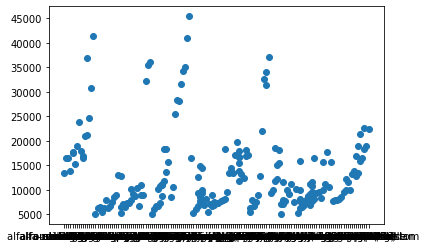

In [9]:
plt.scatter(dataset.CarName, dataset.price)
#plt.scatter(dataset.CarName, dataset.price)

# Plotting graphs

1. FuelType
2. DoorNo
3. EngineLocation
4. CarBody

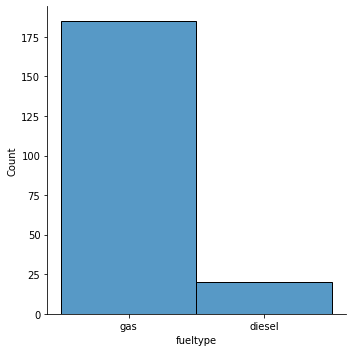

In [10]:
sns.displot(dataset,x='fueltype')

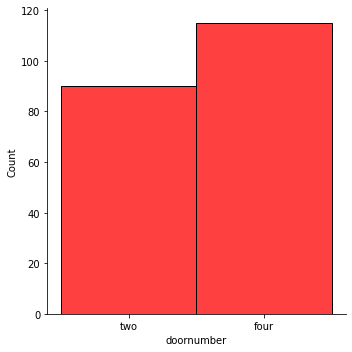

In [11]:
sns.displot(dataset, x='doornumber', color='red')

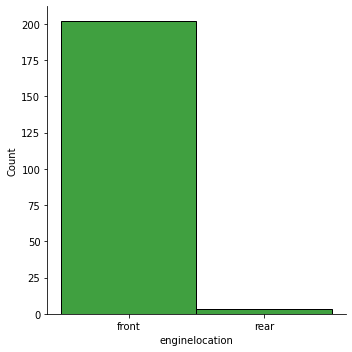

In [12]:
sns.displot(dataset, x='enginelocation', color='green')

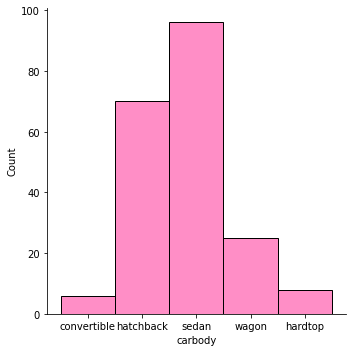

In [13]:
sns.displot(dataset, x='carbody', color='hotpink')

In [14]:
data = pd.DataFrame(dataset, columns=['enginesize', 'price'])
data.cov()

,enginesize,price
enginesize,1734.113917,2.908082e+05
price,290808.157690,6.382176e+07


# Making changes in the dataset

In [112]:
dataset.drop("car_ID", axis=1)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21.000000,27.0,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21.000000,27.0,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,25.277228,26.0,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24.000000,30.0,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18.000000,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23.000000,28.0,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19.000000,25.0,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18.000000,23.0,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26.000000,27.0,22470.0


## Mapping different fueltypes wrt price

In [16]:
for label, content in dataset.items():
    if label == 'fueltype':
        if content == 'gas':
             content.fillna("1", inplace=True)
        else:
             content.fillna("0", inplace=True)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [113]:
data = pd.DataFrame(dataset, columns=['fueltype', 'price'])
data = dataset.fueltype.eq('gas').mul(1) 
data

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    0
204    1
Name: fueltype, Length: 205, dtype: int64

In [23]:
data.value_counts()

1    185
0     20
Name: fueltype, dtype: int64

# Splitting data in labels and feature
# Uni-variate

In [114]:
X = pd.DataFrame(dataset, columns=['enginesize'])
y = pd.DataFrame(dataset, columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [115]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_preds = reg.predict(X_test)

# Evaluating the model

In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

In [29]:
mae = mean_absolute_error(y_test, y_preds)
r2 = r2_score(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)

mae, r2, mse

(2755.219116212158, 0.7459019410391048, 15174421.15204328)

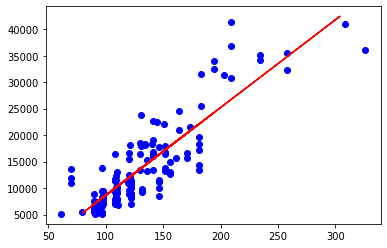

In [30]:
plt.scatter(X_train, y_train, c='blue')
plt.plot(X_test, y_preds, c='red')

# Predicting on random input

In [117]:
y_random = y_test.iloc[12]
x_random = X_test.iloc[12]

y_random_pred = reg.predict(x_random.to_numpy().reshape(-1,1))
print(f"Predicted: {y_random_pred}, Og {y_random}")

Predicted: [[7631.48536613]], Og price    7898.0
Name: 154, dtype: float64


/home/student/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Multi-variate

In [139]:
X = pd.DataFrame(dataset, columns=['enginesize', 'boreratio', 'stroke'])
y = pd.DataFrame(dataset, columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [140]:
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)
y_preds = multi_reg.predict(X_test)

In [143]:
mae = mean_absolute_error(y_test, y_preds)
r2 = r2_score(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)

mae, r2, mse
#(2755.219116212158, 0.7459019410391048, 15174421.15204328)

(2357.083638592613, 0.8334032631319556, 11006688.483041983)

In [172]:
y_random = y_test.iloc[13]
x_random = pd.DataFrame(X_test).iloc[13]
y_random_pred = reg.predict(x_random.to_numpy().reshape(-1,1))
print(f"Predicted: {y_random_pred[0]}, Og {y_random}")

Predicted: [7631.48536613], Og price    5348.0
Name: 150, dtype: float64


/home/student/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# OneHotEncoder

In [166]:
dataset.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          float64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg             float64
highwaympg          float64
price               float64
dtype: object

In [177]:
dataset = pd.read_csv("Car_Price_dataset.csv")
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,NaN,26.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23.0,28.0,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19.0,25.0,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18.0,23.0,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26.0,27.0,22470.0


In [182]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

text_features = ["CarName", "doornumber", "cylindernumber"]
oneHot = OneHotEncoder()

transformer = ColumnTransformer([('oneHot', oneHot, text_features)])
X = transformer.fit_transform(dataset)
y = dataset['price']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_preds = reg.predict(X_test)

In [185]:
mae = mean_absolute_error(y_test, y_preds)
r2 = r2_score(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)

mae, r2, mse
#(2755.219116212158, 0.7459019410391048, 15174421.15204328)
#(2357.083638592613, 0.8334032631319556, 11006688.483041983)

(4242.618443294547, 0.5664887900527673, 29538919.217623793)